In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from pyPSFstack.pupils.sources import DipoleInterfaceSource
from pyPSFstack.pupils.windows import SEO
from pyPSFstack.core import PSFStack
from pyPSFstack.functions import trim_stack
from pyPSFstack.diversities.pola_diversities import PDiversity_QWP, \
    PDiversity_LP, PDiversity_Compound
from pyPSFstack.diversities.pupil_diversities import ZDiversity
from pyPSFstack.blurring.blurring import ExactBlurring, SABlurring

# Using fluorescent beads to emulate single fluorophores

In [83]:
# Define number of points use for the computation 
N_pts = 128
# Experimental parameters
numerical_aperture = 1.49
magnification = 100
ni = 1.33
nf = 1.518
cam_pixel_size = 6500
radius = 100
wavelength = 525
# Define positions of defocus
zi = -600; zf = -zi; z_step = 50
z_list = np.arange(zi,zf+z_step,z_step)
blurring_slices = 20

In [84]:
params = {}
params['pupil'] = {}
params['pupil']['aperture_size'] = numerical_aperture / nf
params['pupil']['computation_size'] = wavelength*magnification/(cam_pixel_size*nf)
params['pupil']['N_pts'] = N_pts

params['source'] = {}
params['source']['ni'] = ni
params['source']['nf'] = nf
params['source']['delta'] = radius/wavelength

params['seo'] = {}
params['seo']['c'] = 1.25*np.pi

params['zdiversity'] = {}
params['zdiversity']['z_list'] = z_list / wavelength
params['zdiversity']['nf'] = nf

params['pdiversity'] = {}
params['pdiversity']['qwp_angles'] = [np.pi/4]
params['pdiversity']['lp_angles'] = [0,np.pi/2]

params['blurring'] = {}
params['blurring']['ni'] = ni
params['blurring']['nf'] = nf
params['blurring']['radius'] = radius/wavelength
diff_del_list = np.linspace(-radius/wavelength,
    radius/wavelength,blurring_slices+2)[1:-1] 


In [85]:
src = DipoleInterfaceSource(**params['pupil'],**params['source'])
seo = SEO(**params['pupil'],**params['seo'])
pupil_sequence = [src, seo]

zdiv = ZDiversity(**params['zdiversity'], **params['pupil'])
qwp = PDiversity_QWP([np.pi/4])
wollaston = PDiversity_LP([0, np.pi/2])
pdiv = PDiversity_Compound([qwp, wollaston])

In [78]:
blurring_exact = ExactBlurring(**params['blurring'],**params['pupil'], diff_del_list=diff_del_list)
blurring_sa = SABlurring(**params['blurring'],**params['pupil'], m=2)

In [86]:
psfs = PSFStack(pupil_sequence, zdiversity=zdiv, pdiversity=pdiv)
psfs.compute_psf_stack(orientation=[0,0,0])

In [87]:
stack = trim_stack(psfs.psf_stack, 30)
stack.shape

(30, 30, 25, 2)

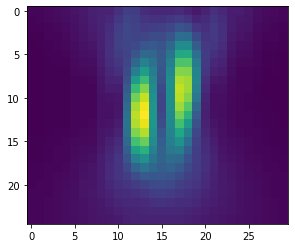

In [92]:
plt.imshow(stack[:,15,:,0].T)

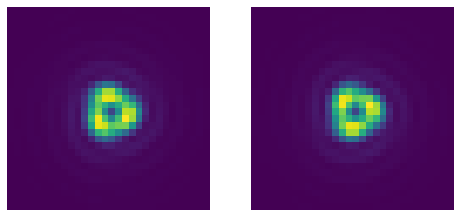

In [14]:
stack = trim_stack(psfs.psf_stack, 30)
stack = trim_stack(np.abs(psfs.psf_stack), 30)
fig, ax = plt.subplots(1,2,figsize=(8,8))
for ind in range(2):
    ax[ind].imshow(stack[...,ind])
    ax[ind].set_axis_off()


In [15]:
psfs = PSFStack(pupil_sequence, pdiversity=pdiv, blurring=blurring_exact)
psfs.compute_psf_stack(orientation=[0,0,0])

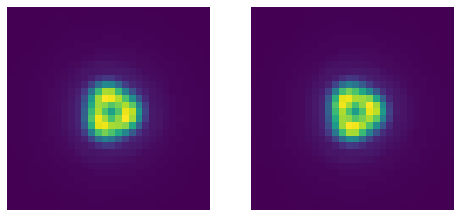

In [16]:
stack = trim_stack(psfs.psf_stack, 30)
stack = trim_stack(np.abs(psfs.psf_stack), 30)
fig, ax = plt.subplots(1,2,figsize=(8,8))
for ind in range(2):
    ax[ind].imshow(stack[...,ind])
    ax[ind].set_axis_off()

In [67]:
blurring_sa = SABlurring(**params['blurring'],**params['pupil'], m=0)

In [68]:
psfs = PSFStack(pupil_sequence, pdiversity=pdiv, blurring=blurring_sa)
psfs.compute_psf_stack(orientation=[0,0,0])
stack = trim_stack(psfs.psf_stack, 30)

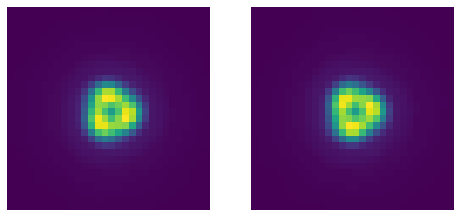

In [69]:
stack = trim_stack(psfs.psf_stack, 30)
stack = trim_stack(np.abs(psfs.psf_stack), 30)
fig, ax = plt.subplots(1,2,figsize=(8,8))
for ind in range(2):
    ax[ind].imshow(stack[...,ind])
    ax[ind].set_axis_off()